<a href="https://colab.research.google.com/github/Jang-Sohyun/IT-Bussiness-2022/blob/main/%EA%B3%BC%EC%A0%9C2_%EB%B6%84%EB%A5%98%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. 분류 문제 선정
- 종속변수: 비만여부(비만이면 1, 아니면 0 2가지 클래스로 분류)
- 독립변수: 음주여부, 흡연상태, 연령, 성별, 허리둘레, 공복혈당, HDL, LDL, 수축기혈압, 이완기혈압 (이전 시각화과제에서 비만도와 연관이 있을 것이라 생각한 요인을 독립변수로 함.)


> 독립변수들에 따른 비만 여부를 분류 모델을 사용하여 예측하고자 함.



#2. 데이터 전처리
기존 시각화 과정에서 사용한 전처리 파일을 기반으로 엑셀을 활용하여 분류모델에 맞게 데이터 전처리를 진행함.


1.   필요없는 변수 삭제: 가입자일련번호, 시도코드, 신장, 체중, 총콜레스테롤, 트리글리세라이드, 혈색소, 혈청크레아티닌
2.   BMI 수치로 추정한 비만도를 기준으로 비만여부라는 새로운 파생변수 생성: 비만도가 obesity인 경우 1, 나머지(underweight, normal, overweight)는 0으로 구분하여 종속변수로 사용.
3.   분류 모델 생성에 용이하도록 변수들의 순서변경 및 변수들의 이름을 영어로 변경
4.   Yes, No로 구분되어 있는 변수를 수치형으로 변경: Yes = 1, No = 0(성별의 경우 M = 0, W = 1)







In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

health = pd.read_csv("/content/drive/MyDrive/IT비즈니스혁신/과제2/health_data_분류모델전처리.csv")

display(health.head(10))
print(health.info())

,obesity,gender,age,waist,BP_High,BP_LWST,BLDS,HDL,LDL,smoke,alcohol
0,0,0,9,72.1,127.0,79.0,90.0,58.0,118.0,0,0
1,1,1,13,81.0,110.0,73.0,87.0,NaN,NaN,0,0
2,0,1,12,70.0,123.0,80.0,102.0,NaN,NaN,0,0
3,1,0,13,90.8,134.0,84.0,146.0,NaN,NaN,0,0
4,0,1,12,75.2,144.0,89.0,110.0,53.0,133.0,0,0
5,0,0,9,94.0,114.0,72.0,86.0,50.0,147.0,1,1
6,1,0,9,93.0,112.0,73.0,250.0,26.0,40.0,1,1
7,1,0,13,92.0,131.0,79.0,93.0,NaN,NaN,1,0
8,0,1,17,82.0,136.0,65.0,104.0,63.0,101.0,0,0
9,0,1,14,71.2,124.0,83.0,85.0,NaN,NaN,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   obesity  10000 non-null  int64  
 1   gender   10000 non-null  int64  
 2   age      10000 non-null  int64  
 3   waist    10000 non-null  float64
 4   BP_High  9912 non-null   float64
 5   BP_LWST  9912 non-null   float64
 6   BLDS     9912 non-null   float64
 7   HDL      4044 non-null   float64
 8   LDL      3977 non-null   float64
 9   smoke    10000 non-null  int64  
 10  alcohol  10000 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 859.5 KB
None


4. 결측치제거



In [ ]:
health = health.dropna(axis=0)   

print("결측치 제거: ", health.shape)
print(health.isna().sum()) 

결측치 제거:  (3977, 11)
obesity    0
gender     0
age        0
waist      0
BP_High    0
BP_LWST    0
BLDS       0
HDL        0
LDL        0
smoke      0
alcohol    0
dtype: int64


#3. 분류 모델1: 의사결정나무
의사결정나무를 이용하여 분류모델 생성. 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = health.iloc[:, 1:] 
y = health.iloc[:, 0] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.735


위의 모델은 depth가 정해지지 않아 학습용 데이터에 과적합된 상태임.


depth를 6으로 정해 아래와 같이 다시 학습시킨 모델을 만듦.

학습용 데이터 정확도는 떨어졌지만, 시험용 데이터 정확도는 증가함.  
시험용 데이터의 정확도를 더 높이고 싶었지만, 5이상이나 이하로 depth를 설정하면 오히려 시험용 데이터의 정확도가 떨어짐을 확인하여 5로 설정함.

In [ ]:
tree = DecisionTreeClassifier(max_depth=5, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.830
시험용 데이터 정확도: 0.798


##의사결정나무 시각화

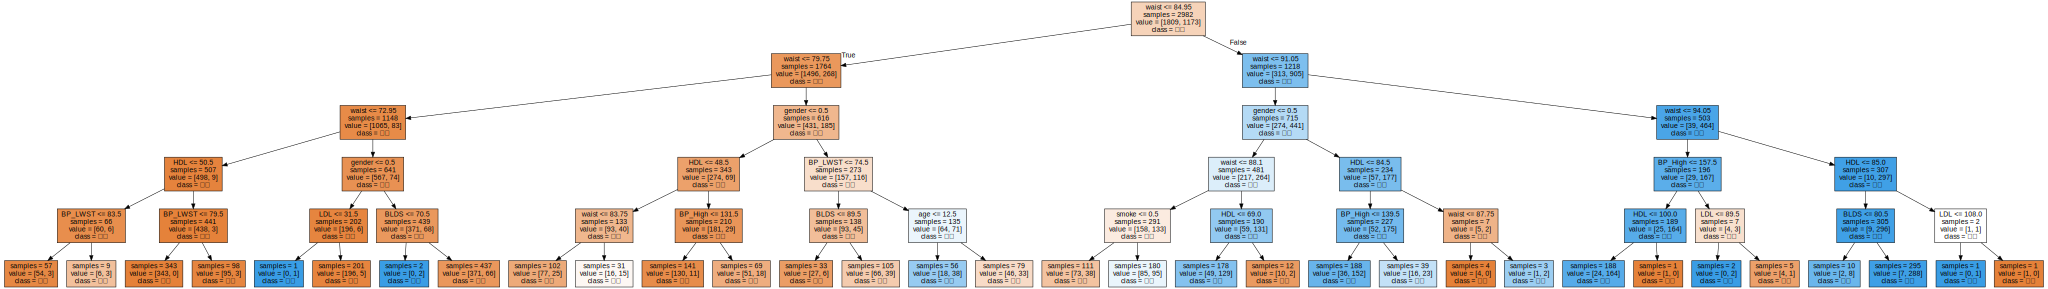

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
# class_names 순서 중요. 잘 생각하기.
export_graphviz(tree, out_file="tree.dot", class_names=[ "정상", "비만"],
                feature_names=health.columns[1:], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

##변수 중요도 시각화

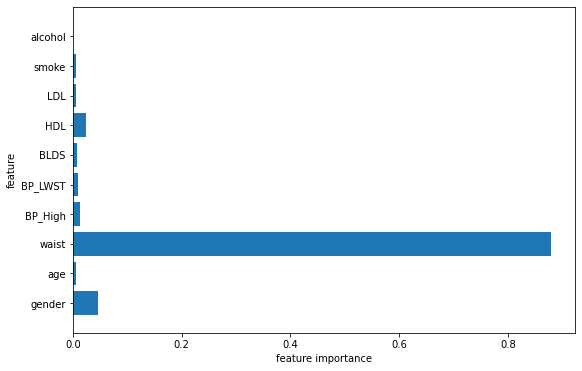

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_feature_importances(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(health.columns[1:])
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), health.columns[1:])
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

plot_feature_importances(tree)

##Insight
가장 중요도가 높은 변수는 허리둘레이고, 그 다음으로 성별, HDL콜레스테롤수치, 수축기혈압 순으로 중요도가 높았다.  
복부비만을 판정할 때 허리둘레를 사용하기 때문에 실제 비만도 예측에서도 가장 중요한 변수로 작용하는 것으로 판단된다. 그리고 이전 시각화 과제에서는 성별과 비만도 사이의 연관성은 파악해보지 않았는데, 성별이 두 번째로 중요한 변수인 것으로 나타났다. 실제로 성별에 따른 신장차이와 체질량지수의 차이로 인해 비만유무에도 어느 정도의 성별 영향이 있음을 알게 되었고, 분류모델에서도 이같은 차이가 나타난 것으로 판단된다.

#4. 분류 모델2: 랜덤포레스트
랜덤포레스트를 이용한 분류 모델 생성.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.805


## 변수 중요도 시각화

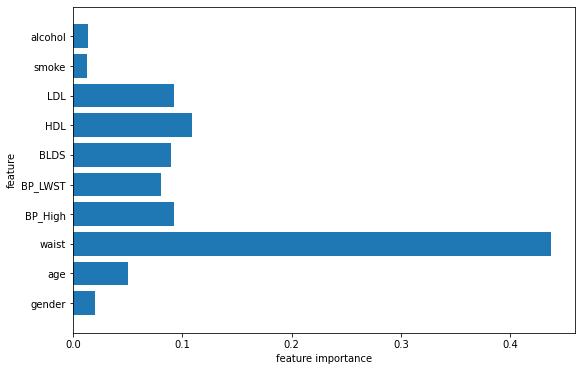

In [ ]:
plot_feature_importances(forest)

## Insight
의사결정나무보다 랜덤포레스트 모델이 정확도가 더 높은 것을 확인할 수 있고, 변수들이 다양하게 사용되면서 각 변수들의 중요도가 높아진 것도 볼 수 있다.  
여전히 허리둘레가 가장 중요한 변수인 것으로 나타났고, 그 다음으로 HDL 콜레스테롤과 LDL콜레스테롤의 중요도가 높았다.비만인 경우 이상지질혈증이 나타날 위험이 높은데, 이는 HDL콜레스테롤이 일정 수치 아래로 떨어지거나 LDL콜레스테롤이 일정 수치 이상으로 증가하면 발생한다. 그래서 HDL과 LDL가 비만유무를 예측하는데에도 큰 영향을 주는 것으로 생각된다.

# 5. 분류 모델3: 그래디언트 부스팅

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.849
시험용 데이터 세트 정확도: 0.802


In [ ]:
# 시험용 데이터의 정확도를 높이기 위해 max_depth를 줄인 모델
gbrt = GradientBoostingClassifier(random_state=0, max_depth=2)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.833
시험용 데이터 세트 정확도: 0.805


## 변수 중요도 시각화

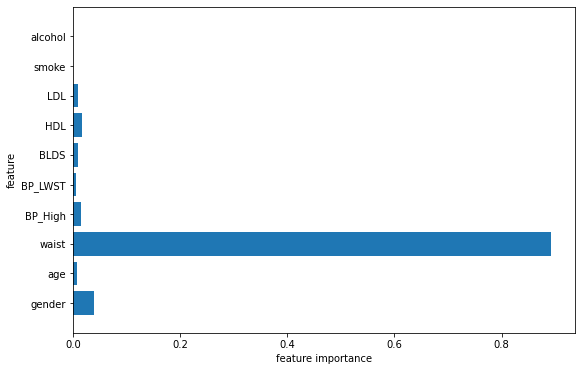

In [ ]:
plot_feature_importances(gbrt)

## Insight
그래디언트 부스팅 모델의 max_depth를 2로 변경함으로써 랜덤포레스트 모델과 같은 정확도를 가지게 되었다. 그러나 각 변수의 중요도는 의사결정나무와 비슷하게 나타났다.  
여기서도 마찬가지로 허리둘레가 가장 중요한 변수임을 확인할 수 있었고, 그 뒤로 성별, HDL, LDL 콜레스테롤 수치가 중요함을 알 수 있다. 이 역시 복부비만에 영향을 주는 요인과 비만으로 인한 이상지질혈증 문제로 인한 결과인 것으로 판단된다.

# 6. 최적의 분류 모델 선택


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 

print(y_test.value_counts())

dt_pred = tree.predict(X_test)
rf_pred = forest.predict(X_test)
gbrt_pred = gbrt.predict(X_test)

print('Decision tree 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, dt_pred)))
print(confusion_matrix(y_test, dt_pred))
print('Random forest 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, rf_pred)))
print(confusion_matrix(y_test, rf_pred))
print('Gradient boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, gbrt_pred)))
print(confusion_matrix(y_test, gbrt_pred))

0    601
1    394
Name: obesity, dtype: int64
Decision tree 시험용 데이터 세트 정확도:0.798
[[510  91]
 [110 284]]
Random forest 시험용 데이터 세트 정확도:0.805
[[537  64]
 [130 264]]
Gradient boosting 시험용 데이터 세트 정확도:0.805
[[539  62]
 [132 262]]


In [ ]:
print('정밀도:{:.3f}'.format(precision_score (y_test, dt_pred, average='binary')))
print('TP (284) / TP+FP (375) = {:.3f}'.format(284/375))
print('재현율:{:.3f}'.format(recall_score(y_test, dt_pred, average='binary')))
print('TP (284) / TP+FN (394) = {:.3f}'.format(284/394))

정밀도:0.757
TP (284) / TP+FP (375) = 0.757
재현율:0.721
TP (284) / TP+FN (394) = 0.721


In [ ]:
print('정밀도:{:.3f}'.format(precision_score (y_test, rf_pred, average='binary')))
print('TP (264) / TP+FP (328) = {:.3f}'.format(264/328))
print('재현율:{:.3f}'.format(recall_score(y_test, rf_pred, average='binary')))
print('TP (264) / TP+FN (394) = {:.3f}'.format(264/394))

정밀도:0.805
TP (264) / TP+FP (328) = 0.805
재현율:0.670
TP (264) / TP+FN (394) = 0.670


In [ ]:
print('정밀도:{:.3f}'.format(precision_score (y_test, gbrt_pred, average='binary')))
print('TP (262) / TP+FP (324) = {:.3f}'.format(262/324))
print('재현율:{:.3f}'.format(recall_score(y_test, gbrt_pred, average='binary')))
print('TP (262) / TP+FN (394) = {:.3f}'.format(262/394))

정밀도:0.809
TP (262) / TP+FP (324) = 0.809
재현율:0.665
TP (262) / TP+FN (394) = 0.665


최적의 분류 모델을 선정하기 위해 confusion matrix를 그리고, 각 모델의 정밀도와 재현율을 계산하였다. 비만이라고 예측한 사람이 실제 비만인 경우(정밀도)와 실제 비만인 사람을 비만으로 예측한 경우(재현율, 민감도) 둘의 비용을 비교해 본다면 사실 어느 경우가 비용이 더 크다고 확실하게 말할 수는 없을 것 같다. 그래도 비만 역시 건강과 관련된 문제이고, 지금 당장은 심각한 문제가 발생하지 않아도 당뇨병, 이상지질혈증 등 다른 건강상 문제를 일으킬 수 있기 때문에 민감도(재현율)가 더 중요하다고 판단했다.


그래서 민감도를 기준으로 최적의 모델을 선정하자면 의사결정나무 모델이 정확도는 낮지만 민감도가 가장 높기 때문에 의사결정나무 모델을 최적의 모델로 선정할 수 있다.